Q1. Mathematical Formula for a Linear SVM:

The decision boundary in a linear SVM is a hyperplane defined by the equation:

w^T * x + b = 0
where:

w (omega) is a weight vector normal to the hyperplane, determining the hyperplane's orientation in the feature space.
x is a data point represented as a vector.
b is the bias term, shifting the hyperplane along the normal vector w.
The positive side of the hyperplane (w^T * x + b > 0) corresponds to one class, and the negative side (w^T * x + b < 0) corresponds to the other class.

Q2. Objective Function of a Linear SVM:

The objective function in a linear SVM aims to maximize the margin (distance between the hyperplane and the closest data points of each class) while minimizing the penalty for misclassified points (if applicable). This can be formulated as:

Minimize:     0.5 * ||w||^2 + C * Σ(ξ_i)   (for soft margin SVM)
where:

0.5 * ||w||^2 is a regularization term penalizing large weight vectors (complexity control).
C is a hyperparameter controlling the trade-off between margin maximization and misclassification penalty.
Σ(ξ_i) is the sum of slack variables (ξ_i) for all data points, representing the total amount of misclassification error allowed (soft margin).
In a hard margin SVM (no misclassification allowed), the objective function simplifies to:

Minimize:     0.5 * ||w||^2
Q3. Kernel Trick in SVM:

The kernel trick allows SVMs to handle non-linearly separable data in the original feature space by implicitly mapping the data into a higher-dimensional feature space where it becomes linearly separable. However, we don't explicitly compute this higher-dimensional space; instead, we use kernel functions that operate directly on the original data points, efficiently computing inner products in the high-dimensional space. Common kernel functions include:

Linear kernel: K(x, y) = x^T * y (suitable for already linearly separable data)
Polynomial kernel: K(x, y) = (x^T * y + c)^d (captures non-linear relationships with adjustable degree d)
Gaussian Radial Basis Function (RBF) kernel: K(x, y) = exp(-||x - y||^2 / (2 * sigma^2)) (powerful for various non-linear patterns, sigma controls smoothness)
Q4. Role of Support Vectors in SVM:

Support vectors (SVs) are the data points that lie closest to the hyperplane on either side, defining the margin. They significantly influence the hyperplane's position and contribute the most to the objective function.

Example:

Consider a binary classification problem (e.g., spam vs. non-spam emails). The SVs might be the most crucial emails that are either strongly indicative of spam or very unlikely to be spam. The SVM learns from these critical emails to establish the decision boundary for classifying new emails.

Q5. Illustration of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM:

Hyperplane: It's the decision boundary that separates different classes in the feature space. For example, in a two-dimensional space, it's a line; in three dimensions, it's a plane.
Marginal plane: These are the planes parallel to the hyperplane that just touch the support vectors. In a soft-margin SVM, these planes define the margin.
Soft margin: In a soft-margin SVM, some margin violations are permitted to allow for better generalization when the data is not perfectly separable. The soft margin allows for some misclassifications.
Hard margin: In a hard-margin SVM, no margin violations are allowed. It works only when the data is linearly separable without any error. It tends to be less robust to noise but may overfit less.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [67]:
df=pd.read_csv('/content/sample_data/Iris.csv')

In [68]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
X =df[['SepalLengthCm', 'SepalWidthCm']].values
Y=df['Species'].values

In [70]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [71]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [76]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
0.9


In [77]:
from mlxtend.plotting import plot_decision_regions

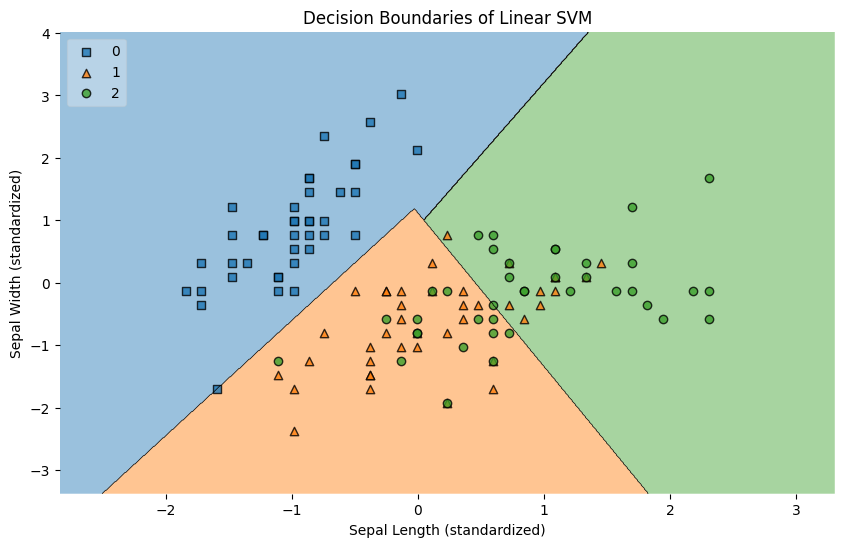

In [78]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train, clf=svm_clf, legend=2)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Decision Boundaries of Linear SVM')
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }

In [84]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [85]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.708 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.708 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.542 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [86]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [87]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         9
           2       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30

[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]
0.9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
